In [1]:
#importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as ani
from matplotlib.animation import ImageMagickWriter 

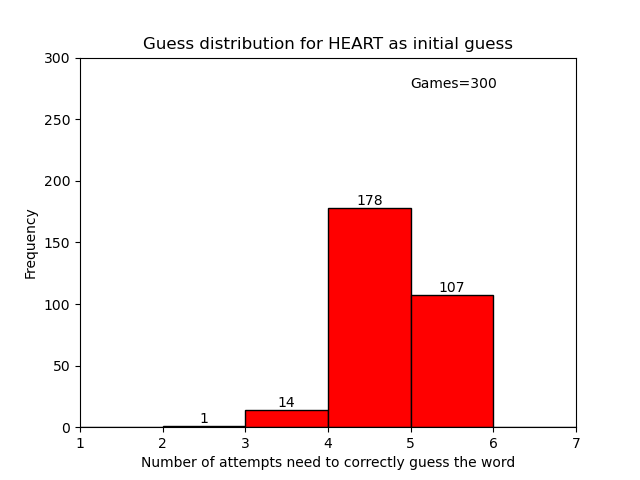

In [3]:
%matplotlib widget
#reading the data
initial_all_res = pd.read_csv('HEART.csv', index_col=None)

#calculate the average number of attempts required per game based on the simulations, excluding simulations that resulted in a loss (-1) or error (0)
initial_avg = ((initial_all_res.replace(0, np.nan)).replace(-1, np.nan)).mean()

#defining the number of game; the number of steps in the animation
total_games = 300

#function responsible for updating the histogram by adding the attempts take for each game one by one
def update_hist(games):
    if games == total_games:
        animation.event_source.stop()
    bins = np.arange(1,8,1)
    plt.cla()
    plt.hist(initial_avg[:games], bins = bins, color='red', edgecolor = 'black')
    plt.axis([1,7,0,300])
    plt.gca().set_title('Guess distribution for HEART as initial guess')
    plt.gca().set_xlabel('Number of attempts need to correctly guess the word')
    plt.gca().set_ylabel('Frequency')
    plt.gca().annotate('Games={}'.format(games), [5, 275])
    for rect in plt.gca().patches:
        ypos = rect.get_height()
        xpos = rect.get_x()
        if(ypos == 0 ):
            continue
        else:
            plt.text(rect.get_x() + rect.get_width() / 2, ypos+0.01, "{}".format(int(ypos)), ha='center', va='bottom')

#creating the figure to use for the histogram plot  
fig = plt.figure()

#creating the animation for the histogram
animation = ani.FuncAnimation(fig=fig, func=update_hist, interval = 50, blit=True, save_count = 301)

#saving the animated histogram as a gif that loops 1 time only
animation.save('HEART.gif', writer=ImageMagickWriter(fps=30, extra_args=['-loop', '1']))

#saving the animated histogram as a gif that loops infinitely
animation.save('HEART_.gif', writer=ImageMagickWriter(fps=30, extra_args=['-loop', '0']))

#saving the histogram as an image
plt.savefig('HEART_.png')

#displaying the plot
plt.show()